In [1]:
import amulet
from amulet.api.block import Block
import numpy as np
import pyvista as pv

INFO - PyMCTranslate Version 317


In [2]:
schem = amulet.load_level("schematics/valkyrie.schematic")

INFO - Loading level schematics/valkyrie.schematic


In [3]:
chunks = list(schem.all_chunk_coords("minecraft:overworld"))

In [ ]:
blocks = np.empty((0, 3), dtype=int)

for chunk_coords in chunks:
    # Get the chunk
    chunk = schem.get_chunk(chunk_coords[0], chunk_coords[1], "minecraft:overworld")
    
    # Iterate over each section
    for section in chunk.blocks.sections:
        # Get the section data
        section_data = chunk.blocks.get_section(section)
        
        # Find indices of all non-zero blocks
        non_zero_indices = np.array(np.nonzero(section_data)).T  # Shape: (N, 3)

        # Calculate world coordinates for all non-zero blocks
        world_x = chunk_coords[0] * 16 + non_zero_indices[:, 0]
        world_y = section * 16 + non_zero_indices[:, 1]
        world_z = chunk_coords[1] * 16 + non_zero_indices[:, 2]
        
        # Stack the coordinates together into a NumPy array
        block_coords = np.column_stack((world_x, world_z, world_y)) # Minecraft uses Y as the vertical axis but we want Z

        # Append to the blocks array
        blocks = np.vstack((blocks, block_coords))

# Print the final blocks array for verification
print(f"Total blocks found: {len(blocks)}")
print(blocks)

Total blocks found: 6243
[[ 6 29 41]
 [ 6 30 41]
 [ 6 31 41]
 ...
 [19 56 55]
 [19 57 55]
 [19 58 55]]


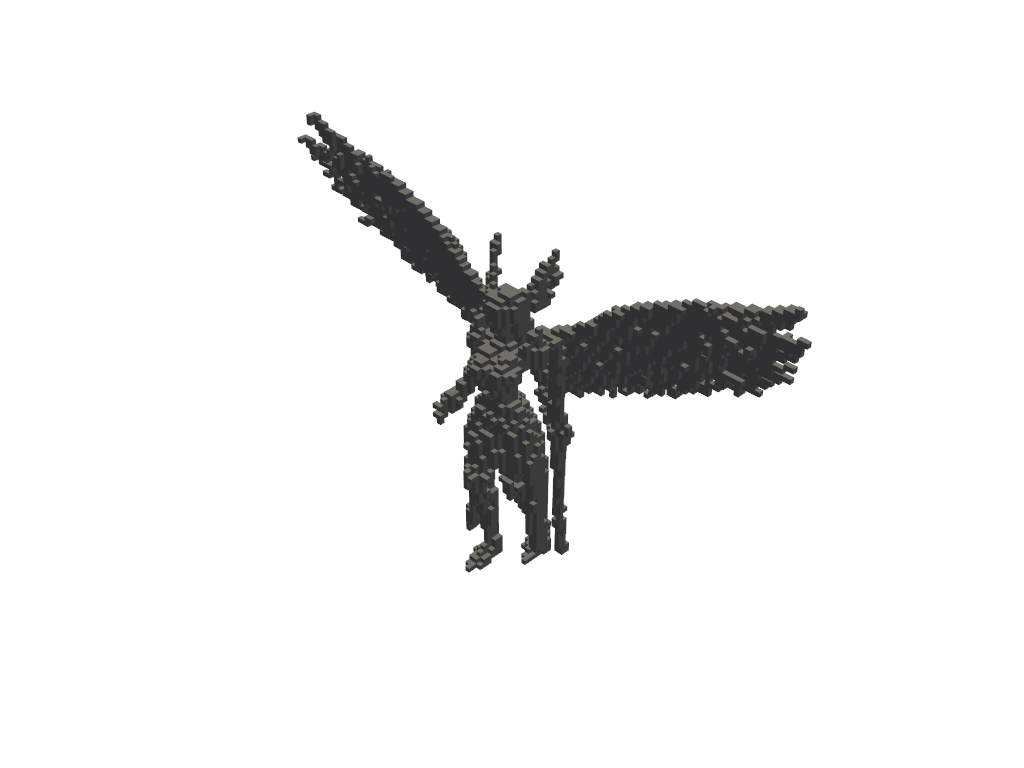

In [6]:
# Create base mesh
voxels = pv.PolyData()
size = 1.0

# Add cubes to mesh
for point in blocks:
    cube = pv.Cube(center=point, x_length=size, y_length=size, z_length=size)
    voxels += cube

# Create static plotter
plotter = pv.Plotter(notebook=True, off_screen=True)
plotter.add_mesh(voxels, color='#808080', opacity=1)

# Show static image
plotter.show(jupyter_backend='static')